In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
import sys

sys.path.append("../")

### EDA and Visualization

This notebook contains relative exploratory data analysis and visualizations based on the features generated by notebook 1.3.

Reload the feature dataset from data/processed

In [41]:
path = "../data/processed/nmr_param_and_features.csv"
with open(path, "r") as file:
    nmr_struc_data = pd.read_csv(file)
nmr_struc_data.head()

,is_O,atom_combination,composition,max_ce,structure_index,diso,etaQ,CQ,fbl_average,fbl_std,...,110,111,112,113,114,115,116,117,118,119
0,True,O,"['O', 'O', 'O', 'O', 'O', 'O']",O:6,0,202.417197,0.001339,0.264794,1.914520,0.083396,...,7.808661e+06,9343.650957,6054.103924,5832.344530,5832.341162,533.498566,145.040097,132.941405,132.941328,95.242235
1,True,O,"['O', 'O', 'O', 'O', 'O', 'O']",O:6,0,202.415778,0.000000,0.264794,1.914520,0.083396,...,7.808661e+06,9343.650957,6054.103924,5832.344530,5832.341162,533.498566,145.040097,132.941405,132.941328,95.242235
2,True,O,"['O', 'O', 'O', 'O', 'O', 'O']",O:6,0,202.418564,0.000000,0.264794,1.914520,0.083396,...,7.808661e+06,9343.650957,6054.103924,5832.344530,5832.341162,533.498566,145.040097,132.941405,132.941328,95.242235
3,True,O,"['O', 'O', 'O', 'O', 'O', 'O']",O:6,0,202.418705,0.001339,0.264794,1.914520,0.083396,...,7.808661e+06,9343.650957,6054.103924,5832.344530,5832.341162,533.498566,145.040097,132.941405,132.941328,95.242235
4,True,O,"['O', 'O', 'O', 'O', 'O', 'O']",O:6,3,196.472860,0.670647,1.521078,1.918155,0.032340,...,7.808556e+06,8985.063376,6145.456281,5999.586723,5887.848974,529.391058,140.079201,136.754511,134.578866,97.192860


#### I. Oxygen or not oxygen?
The dataset is unbalanced in terms of coordinated atomic species. This analysis is aiming to find the difference between the population of the dominate atomic species ('O') and the other types of atoms. This analysis could help to determine whether rebalancing techniques are needed. 

In [42]:
# percentage of is_O sites
percent = len(nmr_struc_data[nmr_struc_data["is_O"] == True]) / len(
    nmr_struc_data["is_O"]
)
print(f"percentage of is_O sites:{percent}\n", f"not is_O sites:{1-percent}")

percentage of is_O sites:0.6952109887390174
 not is_O sites:0.30478901126098257


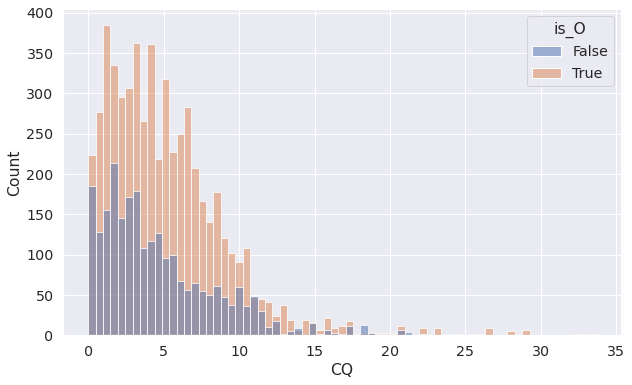

In [43]:
# plot thr distribution of CQ wrt to is_O.
plt.figure(figsize=(10, 6))
sns.histplot(data=nmr_struc_data, x="CQ", hue="is_O")
plt.show()

#### II. Correlation heatmap for pure structural features

Plot the correlation heatmap between the pure structural based features.

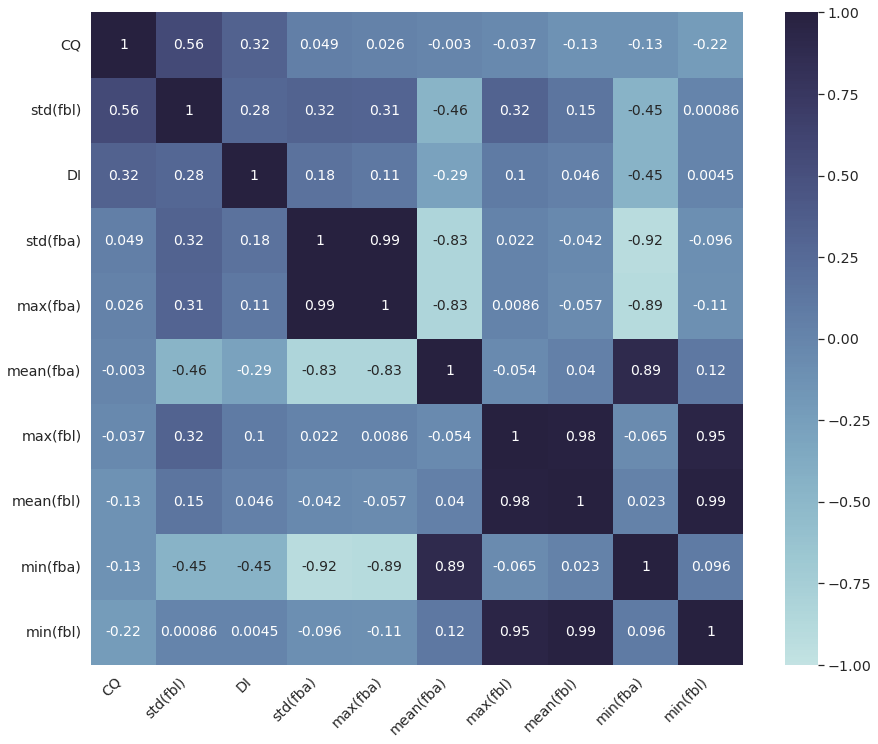

In [31]:
# heat map of structural features

# re-rank the features
feature_rank = [
    "CQ",
    "fbl_std",
    "DI",
    "fba_std",
    "fba_max",
    "fba_average",
    "fbl_max",
    "fbl_average",
    "fba_min",
    "fbl_min",
]
heatmap_data = nmr_struc_data.loc[:, "CQ":"DI"][feature_rank]

# rename features for easier understanding
feature_rename = {
    "fbl_std": "std(fbl)",
    "fbl_min": "min(fbl)",
    "fba_std": "std(fba)",
    "fba_max": "max(fba)",
    "fba_average": "mean(fba)",
    "fbl_max": "max(fbl)",
    "fbl_average": "mean(fbl)",
    "fba_min": "min(fba)",
}

heatmap_data.rename(columns=feature_rename, inplace=True)

corr = heatmap_data.corr()

sns.set(font_scale=1.3)
plt.figure(figsize=[15, 12])
heat_map = sns.heatmap(
    corr,
    vmin=-1,
    vmax=1,
    center=0,
    cmap=sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True),
    square=True,
    annot=True,
    annot_kws={"size": 14},
)
heat_map.set_xticklabels(
    heat_map.get_xticklabels(), rotation=45, horizontalalignment="right"
)
heat_map.set_yticklabels(
    heat_map.get_yticklabels(), rotation=0, horizontalalignment="right"
)
plt.show()

There are several features that have high correlation to each other. We can re-plot the heatmap without collinearity. 

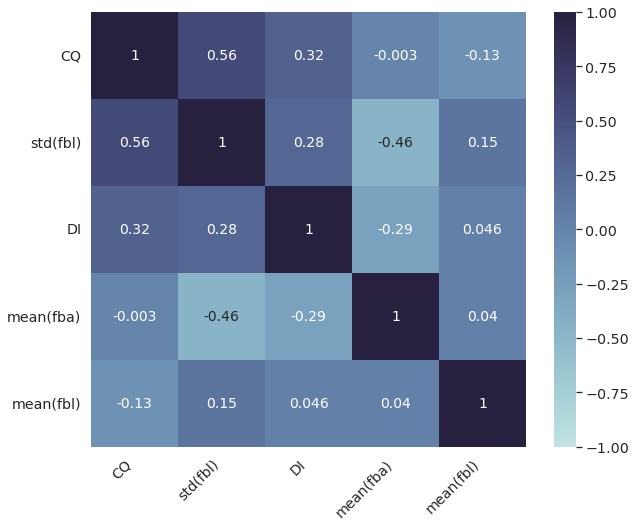

In [32]:
drops = ["std(fba)", "max(fba)", "min(fba)", "max(fbl)", "min(fbl)"]
try:
    corr = corr.drop(drops, axis=0)
    corr = corr.drop(drops, axis=1)
except KeyError:
    pass

sns.set(font_scale=1.3)
plt.figure(figsize=[10, 8])
heat_map = sns.heatmap(
    corr,
    vmin=-1,
    vmax=1,
    center=0,
    cmap=sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True),
    square=True,
    annot=True,
    annot_kws={"size": 14},
)
heat_map.set_xticklabels(
    heat_map.get_xticklabels(), rotation=45, horizontalalignment="right"
)
heat_map.set_yticklabels(
    heat_map.get_yticklabels(), rotation=0, horizontalalignment="right"
)

plt.show()

#### III. Population difference between coordination numbers

View the population distribution for difference coordination numbers (4,5 and 6).

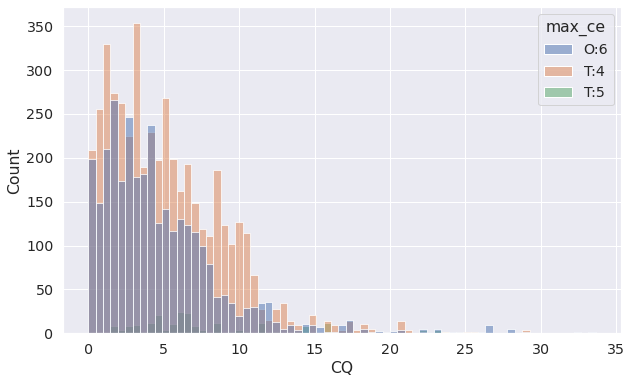

In [33]:
# plot the distribution of CQ wrt the types local geometry.
plt.figure(figsize=(10, 6))
sns.histplot(data=nmr_struc_data, x="CQ", hue="max_ce")
plt.show()

#### IV. Correlation between C<sub>Q</sub> and structural features

We can also plot out target value C<sub>Q</sub> against some representing structural features such as distortion index (DI) and standard deviation of bond lengths (std(fbl)). Notice there are certain points that can not be correctly represented in the plot of C<sub>Q</sub> vs DI. Alternatively, those points can be nicely represented in the plot of C<sub>Q</sub> vs std(fbl).

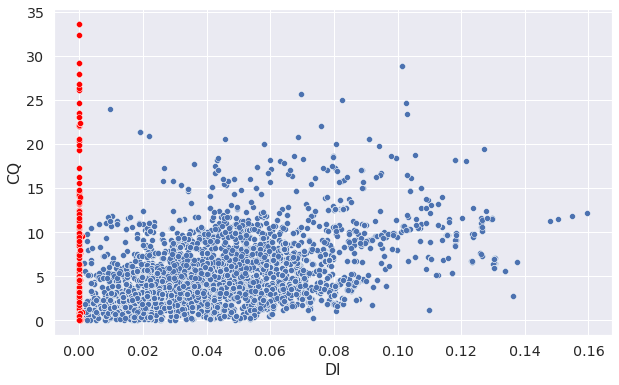

In [34]:
# Noticed that the distrotion index can not correctly represent some of the local geometries. (red labeled ones)
red_labels = nmr_struc_data[(nmr_struc_data["DI"] < 0.001) & (nmr_struc_data["CQ"] > 0)]

fig, ax = plt.subplots(figsize=[10, 6])
sns.scatterplot(data=nmr_struc_data, x="DI", y="CQ", ax=ax)
sns.scatterplot(data=red_labels, x="DI", y="CQ", ax=ax, color="red")
plt.show()

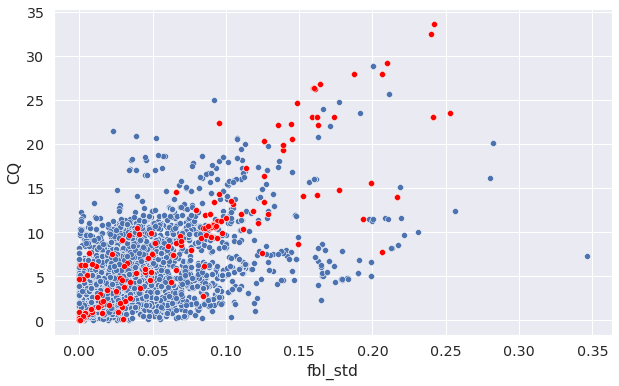

In [35]:
# And these unrepresented geometries are nicely represented by the standard deviation of first order bond length.
fig, ax = plt.subplots(figsize=[10, 6])
sns.scatterplot(data=nmr_struc_data, x="fbl_std", y="CQ", ax=ax)
sns.scatterplot(data=red_labels, x="fbl_std", y="CQ", ax=ax, color="red")
plt.show()